In [1]:
from matplotlib import pyplot as plt
import numpy as np
import skimage, skimage.morphology, skimage.feature
%matplotlib osx

Computes a homogeneous line vector from the $\rho$, $\theta$ parameters returned by SKImage's Hough transform

In [2]:
def homline(rho, theta):
    return [np.cos(theta), np.sin(theta), -rho]

Returns intersection of two homogeneous lines

In [3]:
def homintersect(l1, l2):
    p = np.cross(l1, l2)
    p = p/p[2]
    return p

Produces an image of the same shape given as second parameter, representing the geometrical locus of the predicate in the first parameter: the image is 1 if the predicate holds, 0 otherwise.

In [4]:
def locus_imshape(pred, shape):
    return np.array([[1.0 if pred(x, y) else 0.0 for x in range(0, shape[1])] for y in range(0, shape[0])])

`bwpic` is the B/W version of the analysed picture

In [5]:
pic = plt.imread("pics2/2.JPG")
bwpic = np.linalg.norm(pic, axis=2)

In [6]:
bwpic = skimage.filters.median(bwpic.astype("uint16"), skimage.morphology.disk(8))
bwpic = bwpic/np.max(bwpic)
maskpic = skimage.morphology.binary_dilation(bwpic > 0.8)
maskpic = skimage.morphology.binary_dilation(maskpic)

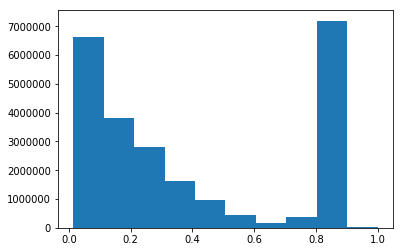

In [7]:
plt.figure("hist")
_ = plt.hist(bwpic.flatten())

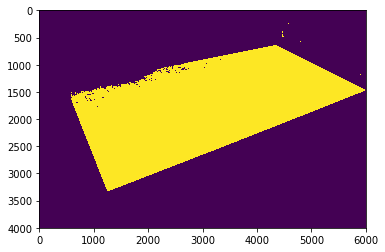

In [8]:
plt.figure("bwmed")
plt.imshow(maskpic)

A histogram is temporarily used to find a good threshold for the table surface

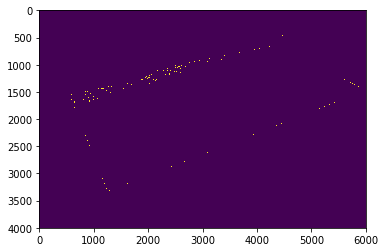

In [9]:
cannypic = skimage.feature.canny(maskpic)
plt.figure('canny')
plt.imshow(cannypic)

In [14]:
hres = skimage.transform.hough_line(cannypic)
threshold = 0.2*np.max(hres[0])
_, angles, dists = skimage.transform.hough_line_peaks(*hres, num_peaks=4, threshold=threshold, min_distance=100)

lines = [homline(rho, theta) for rho, theta in zip(dists, angles)][1:3]
intersections = np.array([homintersect(l1, l2) for i, l1 in enumerate(lines) for j, l2 in enumerate(lines) if i < j])

Vanishing points are recognized by matching the intersections against the mask.

**TODO:** Find image of parallel lines by minimising the difference in angles

In [13]:
angles


array([-0.37734213,  1.20222959,  1.37773756, -1.11447561])

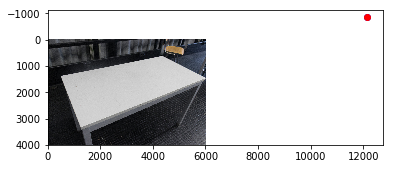

In [15]:
def in_shape(i, j, shape):
    return i >= 0 and j >= 0 and i < shape[0] and j < shape[1]

dilmask = skimage.morphology.binary_dilation(maskpic)
for _ in range(10):
    dilmask = skimage.morphology.binary_dilation(dilmask)

vps = np.array([[x, y, 1] for x, y, _ in intersections if not in_shape(y, x, dilmask.shape) or not dilmask[int(y)][int(x)]])

plt.figure("points")
plt.imshow(pic)
plt.plot(intersections[:,0], intersections[:,1], 'bo')
plt.plot(vps[:, 0], vps[:, 1], 'ro')

In [12]:
lines

[[0.9296472110254966, -0.3684508963654665, 54.503778686819714],
 [0.3602787896813788, 0.932844678231977, -3554.746446647714],
 [0.19186172838690196, 0.9814219669338926, -1469.6018858767238],
 [0.4406482820571759, -0.897679837982373, -1330.592248491992]]